<a href="https://colab.research.google.com/github/marioTavFer/somePython/blob/main/analise_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como analisar dados financeiros com o Python? Um guia para quem deseja sair do Excel

Praticar análise de dados com uma linguagem de programação pode parecer intimidante, mas não é. Neste post, apresentamos os resultados de um exercício de Python voltado para finanças, demonstrando um gráfico útil para profissionais do mercado financeiro.

# Introdução
Existem várias abordagens para realizar análises de dados, e embora a escolha da ferramenta seja importante, algumas oferecem mais facilidade, enquanto outras proporcionam maior flexibilidade. Às vezes, essa flexibilidade pode tornar as coisas mais fáceis, como é o caso do Python para limpeza de dados e cálculos financeiros.

Para obter o código e o tutorial deste exercício faça parte do Clube AM e receba toda semana os códigos em R/Python, vídeos, tutoriais e suporte completo para dúvidas.

Alunos inscritos no curso de Mercado Financeiro e Gestão de Portfólio com o Python têm a oportunidade de adquirir conhecimento em todas as etapas a seguir, além de obter uma compreensão teórica abrangente das principais ferramentas utilizadas no Mercado Financeiro.

# Analisando as ações brasileiras
Vamos considerar um exemplo prático: suponha que desejamos obter os dados de todas as ações que compõem o índice Bovespa, calcular o retorno anualizado para o ano de 2024 e comparar as maiores altas e baixas. Essa comparação pode ser facilmente visualizada por meio de um gráfico.

Pode parecer desafiador para iniciantes, mas aqui está a boa notícia: para realizar essa análise, utilizamos apenas três bibliotecas: pandas para manipulação de dados, yfinance para coleta de dados e plotnine para visualização. Na verdade, a maioria das análises não requer mais do que essas ferramentas básicas.

In [ ]:
# Importa bibliotecas
import yfinance as yf
import pandas as pd
import plotnine as p9

In [ ]:
# Importa tickers
symbols = pd.read_csv('https://aluno.analisemacro.com.br/download/59814/?tmstv=1713270351', index_col = [0])

In [ ]:
# Lista de tickers de ações
tickers = symbols['tickers'].values.tolist()
# Alteração no código!
# Por conta de mudanças na carteira do IBOV, necessário retirar mais tickers!
tickers_to_remove = ['ALSO3.SA', 'ARZZ3.SA', 'CCRO3.SA', 'RRRP3.SA', 'SOMA3.SA', 'CIEL3.SA']
for ticker in tickers_to_remove:
    if ticker in tickers:
        tickers.remove(ticker)

def create_cumulative_returns(assets, start, end):
    # Baixa os dados
    precos_ativos = yf.download(assets, start=start, end=end, ignore_tz=True, auto_adjust=False, multi_level_index=False)
    precos_ativos = precos_ativos.loc[:, ('Close', slice(None))]
    precos_ativos.columns = sorted(tickers)

    # Calculando os retornos diários
    daily_returns = precos_ativos[assets].pct_change().dropna()

    # Calculando o retorno acumulado
    cumulative_returns = (1 + daily_returns).cumprod()
    cumulative_returns = cumulative_returns.iloc[-1] - 1

    return cumulative_returns

In [ ]:
# Calcula os retornos
returns = create_cumulative_returns(tickers, start = '2024-01-02', end = '2024-04-13')

[*********************100%***********************]  80 of 80 completed


In [ ]:
# Cria o DF
returns = pd.DataFrame(returns).reset_index()

# Renomeia as colunas
returns.columns = ['Ações', 'Retornos']

# Captura as 5 maiores altas
top_5_returns = (returns
    .sort_values(by='Retornos', ascending=False)
    .head(n=5))

# Captura as 5 maiores baixas
low_5_returns =  (returns
    .sort_values(by='Retornos', ascending=False)
    .tail(n=5))

In [ ]:
# Junta os dataframes com baixa e alta
top_returns = (
              pd.concat([top_5_returns, low_5_returns])
              .sort_values(by='Retornos', ascending=False)
              .assign(Ações=lambda x: pd.Categorical(x['Ações']))
          )

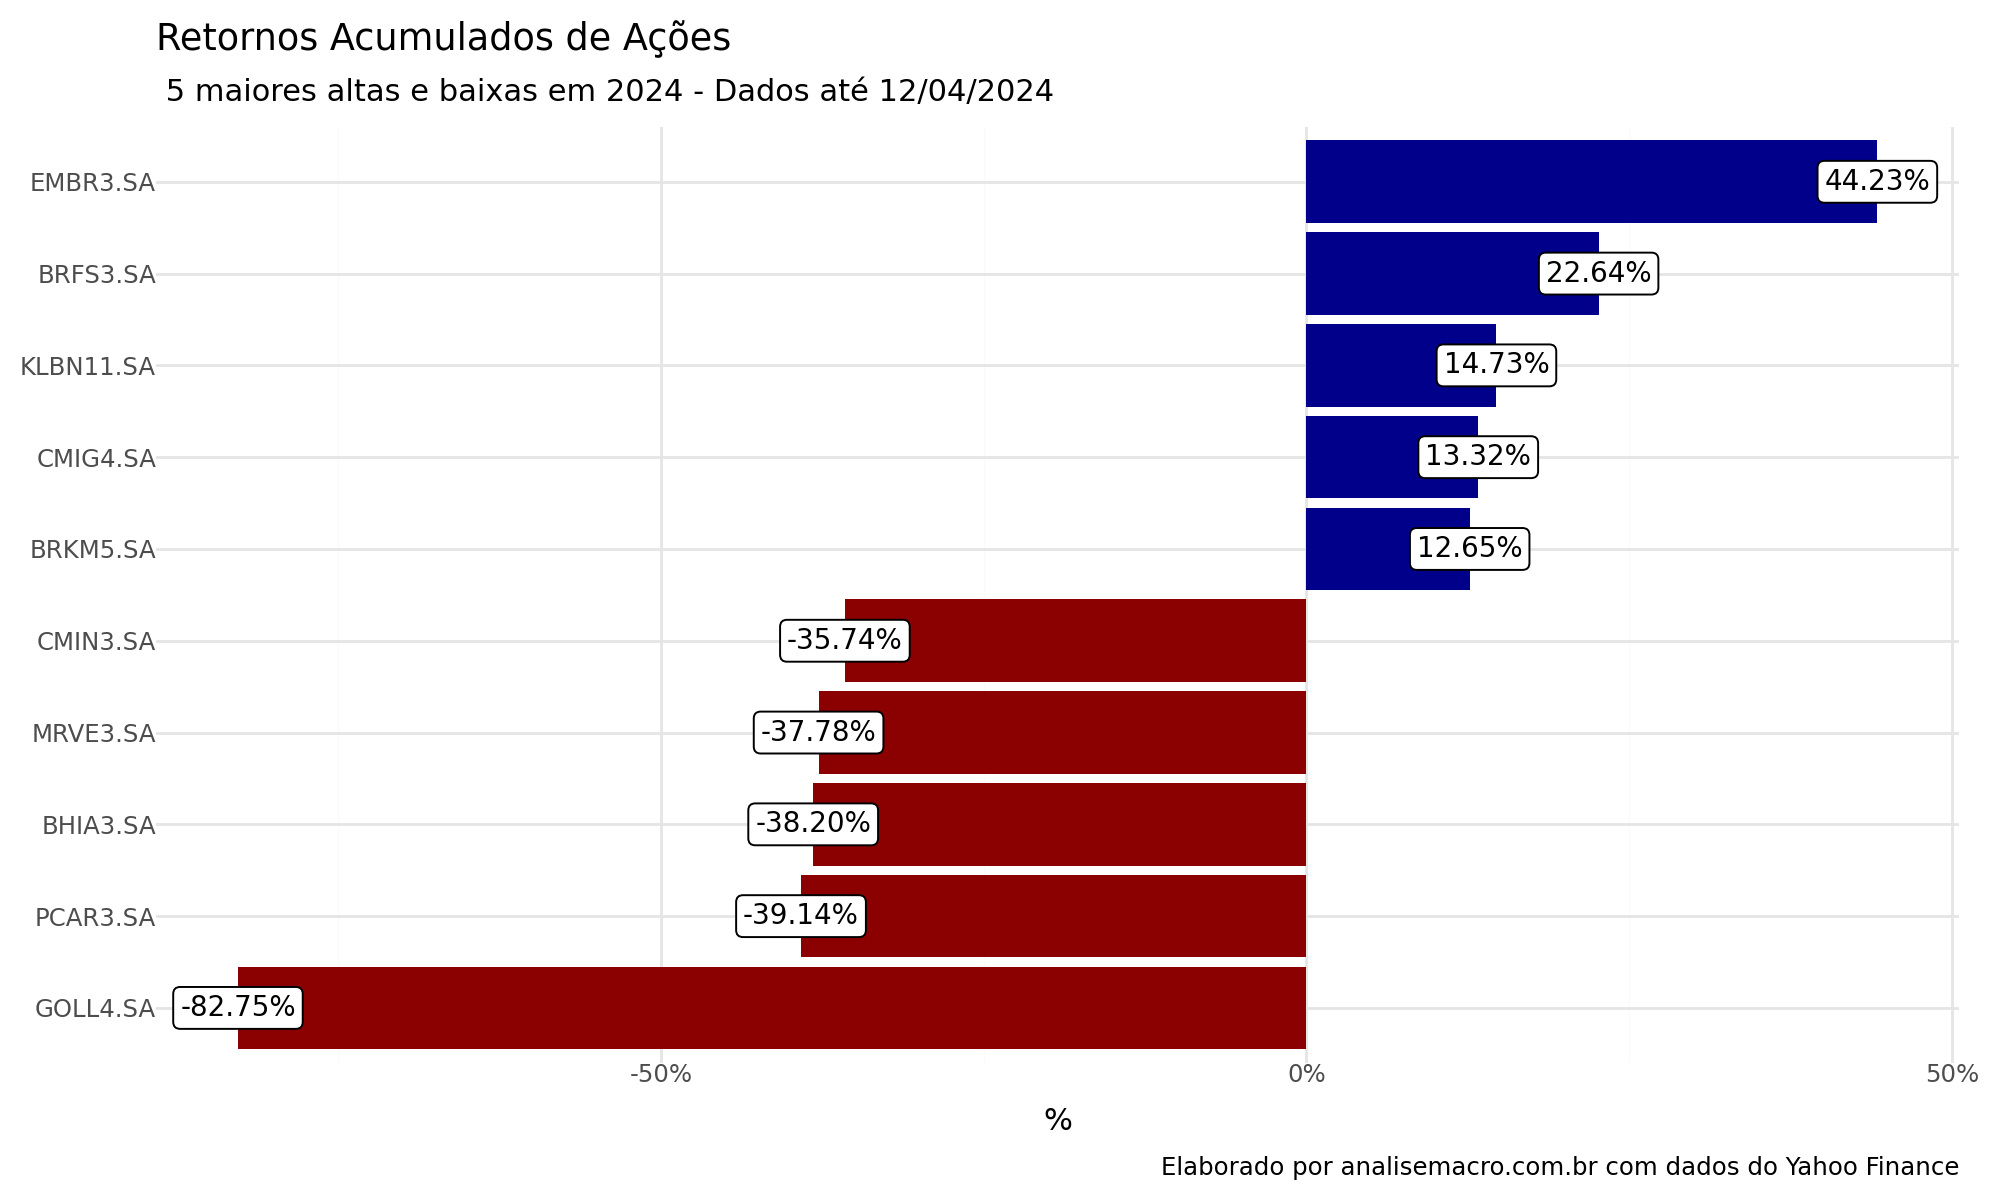

In [ ]:
# Cria o gráfico
(     p9.ggplot(top_returns, p9.aes(x='reorder(Ações, Retornos)', y='Retornos', fill='Retornos > 0'))
           + p9.geom_col(show_legend=False)
           + p9.geom_label(p9.aes(label=(top_returns['Retornos']*100).apply(lambda x: f"{x:.2f}%")), size=10, fill = 'white')
           + p9.scale_fill_manual(values=["darkred", "darkblue"])
           + p9.scale_y_continuous(labels=lambda l: ["{:,.0f}%".format(v * 100) for v in l])
           + p9.labs(title="Retornos Acumulados de Ações",
           subtitle=" 5 maiores altas e baixas em 2024 - Dados até 12/04/2024",
           x="",
           y="%",
           caption="Elaborado por analisemacro.com.br com dados do Yahoo Finance")
           + p9.theme_minimal()
           + p9.theme(figure_size = (10, 6))
           + p9.coord_flip()
           )